In [7]:
# time variable to know the time taken to upload the files
import time
t = time.time()

# Data Import files
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import shuffle

In [8]:
# Global variables: numFiles is the total number of files per user data
# endRow is the limiting of datapoints in the data available
numFiles = 30
endRow = 70000


In [9]:
# Depression data
dep_data=[]

for fileNum in range(1,numFiles+1):
    fileNum = f"{fileNum:02d}"
    location = 'modified_data/depression-mat/leftclosed'+ fileNum +'.txt'
    df = np.loadtxt(location)
    df=  df[0:endRow]
    dep_data.append(df)
    
dep_data = stats.zscore(dep_data)
dep_data = np.asarray(dep_data)
dep_data = np.reshape(dep_data,[700, 3000])

# Normal data
nor_data=[]

for fileNum in range(1,numFiles+1):
    fileNum = f"{fileNum:02d}"
    location = 'modified_data/depression-mat/leftclosed'+ fileNum +'.txt'
    df = np.loadtxt(location)
    df=  df[0:endRow]
    nor_data.append(df)
    
nor_data = stats.zscore(nor_data)
nor_data = np.asarray(nor_data)
nor_data = np.reshape(nor_data,[700, 3000])

In [10]:
# Assembling the data
data = np.concatenate((dep_data,nor_data),axis=1)
print(np.shape(data)) #Prints the shape of data
data = np.transpose(data)
print(np.shape(data)) #Prints the shape of transposed data

# Building labels
label = np.concatenate((np.ones(3000),np.zeros(3000)), axis=0)

#shuffling the set
data,label =shuffle(data, label, random_state=0) 

#reshaping the data
data= data.reshape(data.shape[0], data.shape[1], 1)

(700, 6000)
(6000, 700)


In [11]:
#Import training data and labels from the other python file. In this, the file has already been uploaded
#from dataset import data, label

# Count elapsed time and print it
elapsed = time.time() - t
print("Time taken for data import from dataset.py(in sec):"+str(elapsed))

#importing modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import optimizers, metrics
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

# Count elapsed time for import and print it
elapsed = time.time() - t
print("Time taken for data/modules import(in sec):"+str(elapsed))

Time taken for data import from dataset.py(in sec):13.575112342834473


Using TensorFlow backend.


Time taken for data/modules import(in sec):17.392961740493774


In [12]:
#input data shape for input_shape argument.

data_shape=data.shape[1] 

In [36]:
#CNN network

model = Sequential()
model.add(Conv1D(filters= 32, kernel_size = 5, input_shape=(data_shape,1)))
model.add(MaxPooling1D(pool_size=2,strides=2))

#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.add(Activation("relu"))

In [37]:
#Optimizers

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

In [38]:
#Configures the model for training

model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [59]:
#Data Splitting: Train, test

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=0)
print(np.shape(X_test))
print(np.shape(X_train))

(600, 700, 1)
(5400, 700, 1)


In [60]:
X=data
y=label

In [67]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train, batch_size=64, epochs=1)
    score = model.evaluate(X_test, y_test, batch_size=10)

Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 2s 3ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 1s 2ms/step
Epoch 1/1
600/600 [==============================] - 2s 3ms/step


In [71]:
print(score)

[0.25004871636629106, 0.5000000103066365]


In [40]:
# Train to train, CV

#X_train, X_CV, y_train, y_CV = train_test_split(X_Train, y_Train, test_size=0.1, random_state=0)

In [41]:
#Training : Trains the model for a given number of epochs (iterations on a dataset)

#model.fit(X_train, y_train, batch_size=64, epochs=1)

Epoch 1/1
4860/4860 [==============================] - 20s 4ms/step - loss: 0.2541 - acc: 0.4977


In [42]:
#evaluate: Returns the loss value & metrics values(accuracy) for the model in test mode.

#score = model.evaluate(X_CV, y_CV, batch_size=10)
#print("Evaluation score is ", score)

540/540 [==============================] - 1s 3ms/step
Evaluation score is  [0.2507997712603322, 0.4981481576407397]


In [43]:
#Generates output predictions for the input samples

predictions = model.predict(X_test, batch_size=None, verbose=0)
print("Output predictions")
score = model.evaluate(X_test, y_test, batch_size=10)
print("Evaluation score is ", score)

Output predictions
600/600 [==============================] - 2s 3ms/step
Evaluation score is  [0.24966644123196602, 0.5200000042716663]


In [44]:
#predictions, y_test

v = np.empty([600, 2]) 
v[:,0] = predictions[:,0]
v[:,1]= y_test[:] 

In [45]:
#save the value to a text file

np.savetxt("a.txt",v,fmt='%4f')

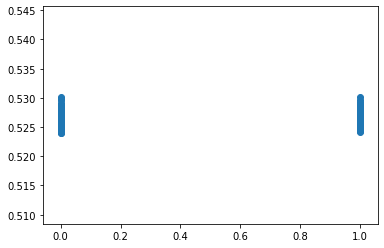

In [46]:
#Plot of y_test vs predictions
from matplotlib import pyplot as plt

## The line / model
plt.scatter(y_test, predictions)
#plt.xlabel(“Values”)
#plt.ylabel(“Predictions”)

In [47]:
# Print the predictions vs y_test value 
#Only first two values
print(v[0:2])

[[0.52756304 0.        ]
 [0.52602589 1.        ]]


In [48]:
from sklearn.model_selection import cross_val_score